In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv('/content/BIKE DETAILS.csv')

In [11]:
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


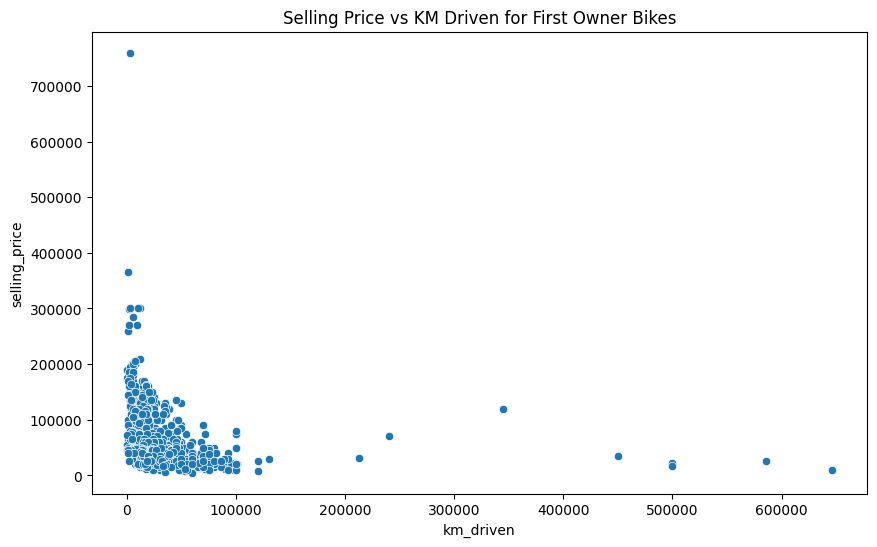

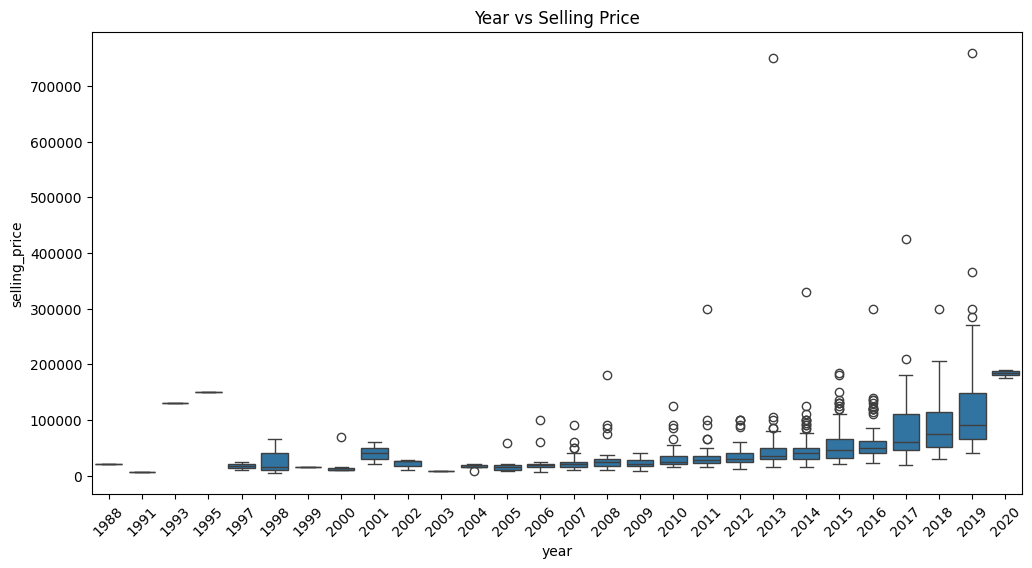

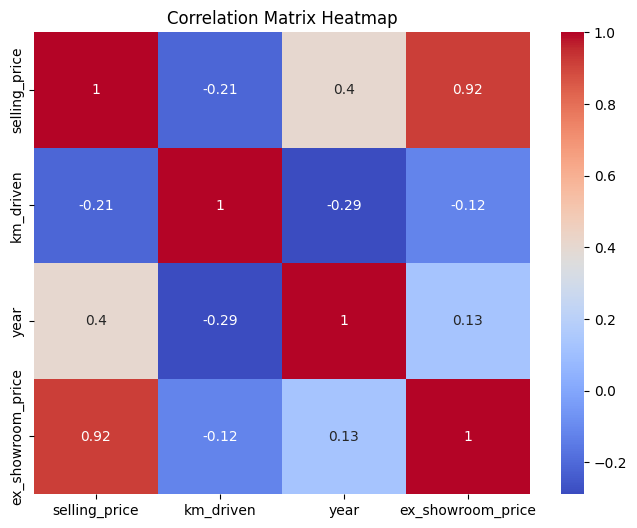

In [14]:
# Q1. Range of selling prices
selling_price_range = (data['selling_price'].min(), data['selling_price'].max())

# Q2. Median selling price
median_selling_price = data['selling_price'].median()

# Q3. Most common seller type
common_seller_type = data['seller_type'].mode()[0]

# Q4. Bikes with more than 50,000 km driven
bikes_above_50000_km = data[data['km_driven'] > 50000].shape[0]

# Q5. Average km driven for each ownership type
average_km_by_owner = data.groupby('owner')['km_driven'].mean()

# Q6. Proportion of bikes from 2015 or older
bikes_2015_or_older = (data['year'] <= 2015).sum() / len(data)

# Q7. Missing values trend
missing_values = data.isnull().sum()

# Q8. Highest ex_showroom_price and corresponding bike
highest_ex_showroom = data.loc[data['ex_showroom_price'].idxmax()]

# Q9. Total bikes by seller type
bikes_by_seller = data['seller_type'].value_counts()

# Q10. Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = data[data['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs KM Driven for First Owner Bikes')
plt.show()

# Q11. Remove outliers in km_driven using IQR
Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1
outliers_removed = data[(data['km_driven'] >= (Q1 - 1.5 * IQR)) & (data['km_driven'] <= (Q3 + 1.5 * IQR))]

# Q12. Bivariate analysis: Year vs Selling Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=data)
plt.xticks(rotation=45)
plt.title('Year vs Selling Price')
plt.show()

# Q13. Average depreciation in selling price based on bike age
current_year = 2024
average_depreciation = data.groupby('year')['selling_price'].mean().apply(lambda x: current_year - x)

# Q14. Bikes priced above average for their year
avg_price_by_year = data.groupby('year')['selling_price'].mean()
high_priced_bikes = data[data['selling_price'] > data['year'].map(avg_price_by_year)]

# Q15. Correlation matrix and heatmap
correlation_matrix = data[['selling_price', 'km_driven', 'year', 'ex_showroom_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

